In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

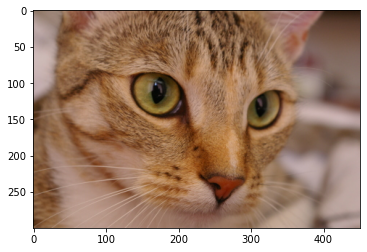

In [2]:
import skimage.data
img = skimage.data.chelsea()
plt.imshow(img)

In [3]:
img  = skimage.color.rgb2gray(img)

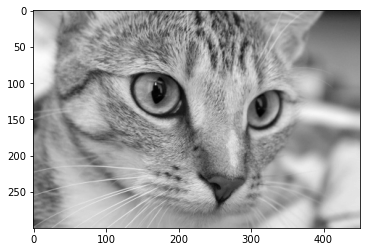

In [4]:
plt.imshow(img, cmap ='gray')

<img src = './convolutional.png'>

<h3>Preparing filters<h3>

In [5]:
l1_filter = np.zeros((2,3,3))
l1_filter[0,:,:] = np.array([[[-1,0,1],
                              [-1,0,1],
                              [-1,0,1]]])
l1_filter[1,:,:] = np.array([[[1,1,1],
                              [0,0,0],
                              [-1,-1,-1]]])

<h3> Conv Layer<h3>
<img src='./convolutional1.jpg'>

In [27]:
def conv(img, conv_filter):
    if len(img.shape) > 2 or len(conv_filter.shape) > 3:
        if img.shape[-1] != conv_filter.shape[-1]:
            print('Errpr: NUmber of channels in both iamge and filter must match')
            sys.exit()
    if conv_filter.shape[1] != conv_filter.shape[2]:
        print('Error: Filter must be a square matrix, i.e., number of rows and columns must match.')
        sys.exit()
    if conv_filter.shape[1]%2==0: 
        print('Error: Filter must have an odd size, i.e., number of rows and columns must be odd.')
        sys.exit()
    feature_maps = np.zeros((img.shape[0] -conv_filter.shape[1] + 1,
    img.shape[1]-conv_filter.shape[1] + 1,
    conv_filter.shape[0]))
    for filter_num in range(conv_filter.shape[0]):
        print('Filter', filter_num + 1)
        curr_filter = conv_filter[filter_num,:]
        if(len(curr_filter.shape)>2):
            conv_map = conv_(img[:,:,0], curr_filter[:,:,0])
            for ch_num in range(1,curr_filter.shape[-1]):
                conv_map = conv_map + conv_(img[:,:,ch_num],curr_filter[:,:,ch_num])
                print('shjow conv_map', conv_map.shape)
        else:
            conv_map = conv_(img, curr_filter)
        feature_maps[:,:,filter_num]=conv_map
    return feature_maps
    


In [7]:
def conv_(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = np.zeros((img.shape))
    for r in np.uint16(np.arange(filter_size/2.0,img.shape[0]-filter_size/2.0+1)):
        for c in np.uint16(np.arange(filter_size/2.0,img.shape[1]-filter_size/2.0+1)):
            curr_region = img[r-np.uint16(np.floor(filter_size/2.0)):r+np.uint16(np.ceil(filter_size/2.0)),c-np.uint16(np.floor(filter_size/2.0)):c+np.uint16(np.ceil(filter_size/2.0))]
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result)
            result[r, c] = conv_sum
    final_result = result[np.uint16(filter_size/2.0):result.shape[0]-np.uint16(filter_size/2.0),np.uint16(filter_size/2.0):result.shape[1]-np.uint16(filter_size/2.0)]
    return final_result

<h3>ReLu Layter</h3>

In [8]:
def relu(feature_map):
    relu_out = np.zeros(feature_map.shape)
    for map_num in range(feature_map.shape[-1]):
        for r in np.arange(0, feature_map.shape[0]):
            for c in np.arange(0, feature_map.shape[1]):
                relu_out[r,c,map_num] = np.max([feature_map[r,c,map_num],0])
    return relu_out

In [9]:
l1_feature_map = conv(img, l1_filter)

Filter 1
Filter 2


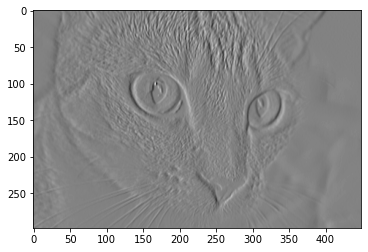

In [10]:
plt.imshow(l1_feature_map[:,:,0], cmap = 'gray')

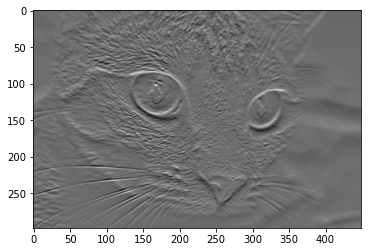

In [11]:
plt.imshow(l1_feature_map[:,:,1], cmap = 'gray')

In [12]:
l1_feature_map_relu = relu(l1_feature_map)

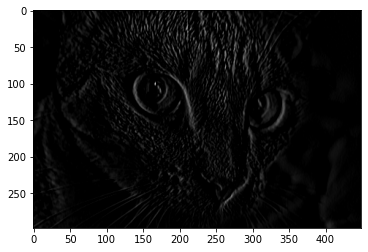

In [13]:
plt.imshow(l1_feature_map_relu[:,:,0], cmap = 'gray')

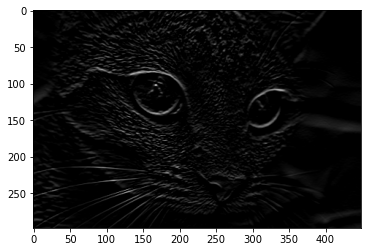

In [14]:
plt.imshow(l1_feature_map_relu[:,:,1], cmap = 'gray')

<h3>Max pooling layer</h3>

In [15]:
def pooling(feature_map, size = 2, stride = 2):
    pool_out = np.zeros((np.uint16((feature_map.shape[0]-size + 1)/stride + 1),np.uint16((feature_map.shape[1]-size + 1)/stride + 1), feature_map.shape[-1]))
    for map_num in range(feature_map.shape[-1]):
        r2 = 0
        for r in np.arange(0, feature_map.shape[0]-size+1, stride):
            c2 = 0
            for c in np.arange(0, feature_map.shape[1] -size + 1, stride):
                pool_out[r2,c2,map_num] = np.max([feature_map[r:r+size, c:c+size]])
                c2 += 1
            r2+=1
    return pool_out

In [16]:
l1_feature_map_relu_pool = pooling(l1_feature_map_relu, 2,2)

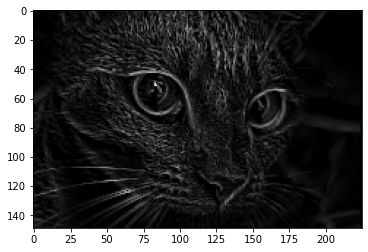

In [17]:
plt.imshow(l1_feature_map_relu_pool[:,:,0], cmap='gray')

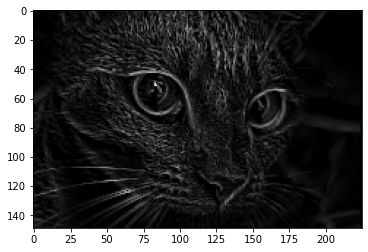

In [18]:
plt.imshow(l1_feature_map_relu_pool[:,:,1], cmap='gray')

<h3> Stacking Layer</h3>
<h3> Layer 2 </h3>

In [19]:
l2_filter = np.random.rand(3, 5, 5,l1_feature_map_relu_pool.shape[-1])
print("\n**Working with conv layer 2**")


**Working with conv layer 2**


In [28]:
l2_feature_map = conv(l1_feature_map_relu_pool, l2_filter)

Filter 1
shjow conv_map (145, 221)
Filter 2
shjow conv_map (145, 221)
Filter 3
shjow conv_map (145, 221)


In [22]:
l2_feature_map_relu = relu(l2_feature_map)

In [30]:
l2_feature_map_relu_pool = pooling(l2_feature_map_relu, 2, 2)

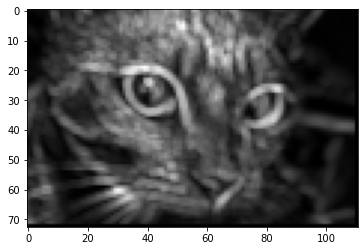

In [33]:
plt.imshow(l2_feature_map_relu_pool[:,:,0], cmap = 'gray')

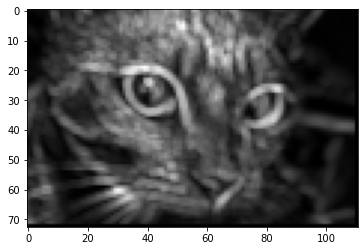

In [34]:
plt.imshow(l2_feature_map_relu_pool[:,:,1], cmap = 'gray')

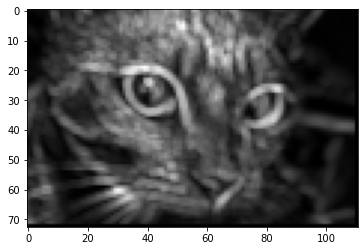

In [35]:
plt.imshow(l2_feature_map_relu_pool[:,:,2], cmap = 'gray')

<h3> Layer 3</h3>

In [37]:
l3_filter = np.random.rand(1, 7, 7, l2_feature_map_relu_pool.shape[-1])
l3_feature_map = conv(l2_feature_map_relu_pool, l3_filter)
l3_feature_map_relu = relu(l3_feature_map)
l3_feature_map_relu_pool = pooling(l3_feature_map_relu, 2, 2)

Filter 1
shjow conv_map (67, 105)
shjow conv_map (67, 105)


In [50]:
fig0, ax0 = plt.subplots(nrows=1, ncols=1)
ax0.imshow(img).set_cmap("gray")
ax0.set_title("Input Image")
ax0.get_xaxis().set_ticks([])
ax0.get_yaxis().set_ticks([])
plt.savefig("in_img.png", bbox_inches="tight")
plt.close(fig0)
#Layer 1
fig1, ax1 = plt.subplots(nrows=3, ncols=2)
ax1[0, 0].imshow(l1_feature_map[:, :, 0]).set_cmap("gray")
ax1[0, 0].get_xaxis().set_ticks([])
ax1[0, 0].get_yaxis().set_ticks([])
ax1[0, 0].set_title("L1-Map1")

ax1[0, 1].imshow(l1_feature_map[:, :, 1]).set_cmap("gray")
ax1[0, 1].get_xaxis().set_ticks([])
ax1[0, 1].get_yaxis().set_ticks([])
ax1[0, 1].set_title("L1-Map2")

ax1[1, 0].imshow(l1_feature_map_relu[:, :, 0]).set_cmap("gray")
ax1[1, 0].get_xaxis().set_ticks([])
ax1[1, 0].get_yaxis().set_ticks([])
ax1[1, 0].set_title("L1-Map1ReLU")

ax1[1, 1].imshow(l1_feature_map_relu[:, :, 1]).set_cmap("gray")
ax1[1, 1].get_xaxis().set_ticks([])
ax1[1, 1].get_yaxis().set_ticks([])
ax1[1, 1].set_title("L1-Map2ReLU")

ax1[2, 0].imshow(l1_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax1[2, 0].get_xaxis().set_ticks([])
ax1[2, 0].get_yaxis().set_ticks([])
ax1[2, 0].set_title("L1-Map1ReLUPool")

ax1[2, 1].imshow(l1_feature_map_relu_pool[:, :, 1]).set_cmap("gray")
ax1[2, 0].get_xaxis().set_ticks([])
ax1[2, 0].get_yaxis().set_ticks([])
ax1[2, 1].set_title("L1-Map2ReLUPool")

plt.savefig("L1.png", bbox_inches="tight")
plt.close(fig1)

In [52]:
# Layer 2
fig2, ax2 = plt.subplots(nrows=3, ncols=3)
ax2[0, 0].imshow(l2_feature_map[:, :, 0]).set_cmap("gray")
ax2[0, 0].get_xaxis().set_ticks([])
ax2[0, 0].get_yaxis().set_ticks([])
ax2[0, 0].set_title("L2-Map1")
ax2[0, 1].imshow(l2_feature_map[:, :, 1]).set_cmap("gray")
ax2[0, 1].get_xaxis().set_ticks([])
ax2[0, 1].get_yaxis().set_ticks([])
ax2[0, 1].set_title("L2-Map2")
ax2[0, 2].imshow(l2_feature_map[:, :, 2]).set_cmap("gray")
ax2[0, 2].get_xaxis().set_ticks([])
ax2[0, 2].get_yaxis().set_ticks([])
ax2[0, 2].set_title("L2-Map3")
ax2[1, 0].imshow(l2_feature_map_relu[:, :, 0]).set_cmap("gray")
ax2[1, 0].get_xaxis().set_ticks([])
ax2[1, 0].get_yaxis().set_ticks([])
ax2[1, 0].set_title("L2-Map1ReLU")
ax2[1, 1].imshow(l2_feature_map_relu[:, :, 1]).set_cmap("gray")
ax2[1, 1].get_xaxis().set_ticks([])
ax2[1, 1].get_yaxis().set_ticks([])
ax2[1, 1].set_title("L2-Map2ReLU")
ax2[1, 2].imshow(l2_feature_map_relu[:, :, 2]).set_cmap("gray")
ax2[1, 2].get_xaxis().set_ticks([])
ax2[1, 2].get_yaxis().set_ticks([])
ax2[1, 2].set_title("L2-Map3ReLU")
ax2[2, 0].imshow(l2_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax2[2, 0].get_xaxis().set_ticks([])
ax2[2, 0].get_yaxis().set_ticks([])
ax2[2, 0].set_title("L2-Map1ReLUPool")
ax2[2, 1].imshow(l2_feature_map_relu_pool[:, :, 1]).set_cmap("gray")
ax2[2, 1].get_xaxis().set_ticks([])
ax2[2, 1].get_yaxis().set_ticks([])
ax2[2, 1].set_title("L2-Map2ReLUPool")
ax2[2, 2].imshow(l2_feature_map_relu_pool[:, :, 2]).set_cmap("gray")
ax2[2, 2].get_xaxis().set_ticks([])
ax2[2, 2].get_yaxis().set_ticks([])
ax2[2, 2].set_title("L2-Map3ReLUPool")
plt.savefig("L2.png", bbox_inches="tight")
plt.close(fig2)

In [53]:
# Layer 3
fig3, ax3 = plt.subplots(nrows=1, ncols=3)
ax3[0].imshow(l3_feature_map[:, :, 0]).set_cmap("gray")
ax3[0].get_xaxis().set_ticks([])
ax3[0].get_yaxis().set_ticks([])
ax3[0].set_title("L3-Map1")
ax3[1].imshow(l3_feature_map_relu[:, :, 0]).set_cmap("gray")
ax3[1].get_xaxis().set_ticks([])
ax3[1].get_yaxis().set_ticks([])
ax3[1].set_title("L3-Map1ReLU")
ax3[2].imshow(l3_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax3[2].get_xaxis().set_ticks([])
ax3[2].get_yaxis().set_ticks([])
ax3[2].set_title("L3-Map1ReLUPool")
plt.savefig("L3.png", bbox_inches="tight")
plt.close(fig3)